In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# 1.Dataset Exploration

In [2]:
df=pd.read_csv("D:\python_study\Assignment3\Churn_Modelling.csv")

In [3]:
df.shape

(10002, 14)

## 1.1 Duplicated Samples Check and Remove

In [4]:
#Duplicate customer ID checks, find two customers have duplicated records
df[df.duplicated(subset='CustomerId')==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [5]:
# display duplicated records
df[df['CustomerId'].isin([15682355,15628319])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [6]:
# drop duplicated records
df.drop_duplicates(['CustomerId'],inplace=True)

## 1.2 Exploratory Data Analysis

### 1.2.1 display dataset structure and base information 

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        9999 non-null   object 
 5   Gender           10000 non-null  object 
 6   Age              9999 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        9999 non-null   float64
 11  IsActiveMember   9999 non-null   float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [9]:
# Explore the ratio of the target variable
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
# drop the identity attribute variable
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [11]:
# Displays the remaining columns
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### 1.2.2 display histplots of variables

<Axes: xlabel='Geography', ylabel='Count'>

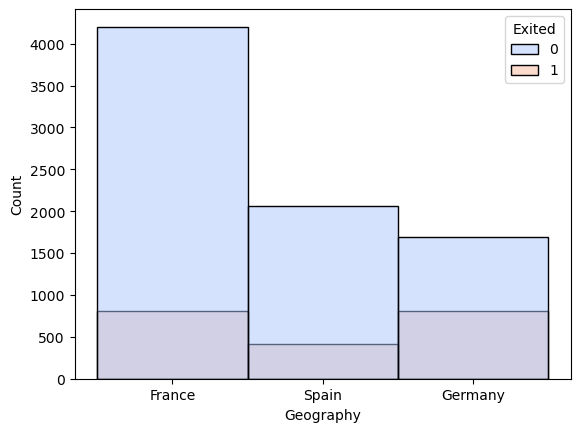

In [12]:
sns.histplot(df, x = 'Geography', hue = 'Exited',palette="coolwarm")

<Axes: xlabel='Gender', ylabel='Count'>

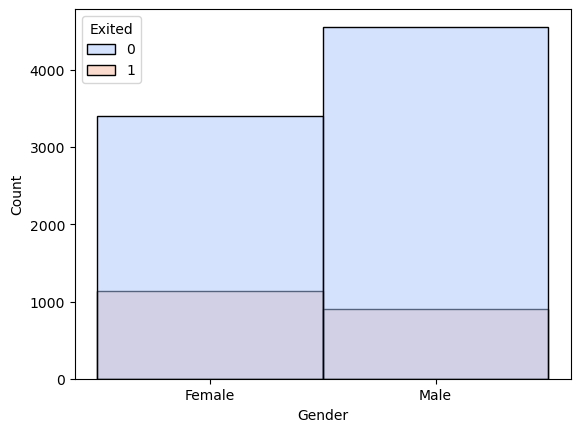

In [13]:
sns.histplot(df,x="Gender",hue="Exited",palette="coolwarm")

<Axes: xlabel='Age', ylabel='Count'>

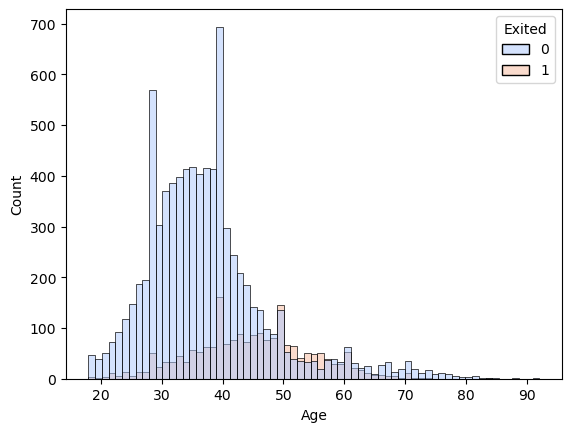

In [14]:
sns.histplot(df,x="Age",hue="Exited",palette="coolwarm")

<Axes: xlabel='CreditScore', ylabel='Count'>

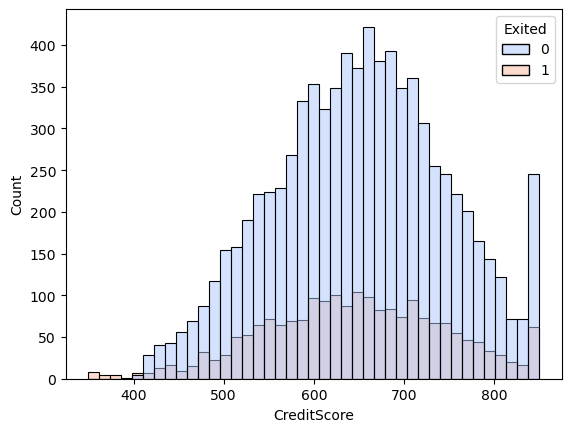

In [15]:
sns.histplot(df,x="CreditScore",hue="Exited",palette="coolwarm")

<Axes: xlabel='Balance', ylabel='Count'>

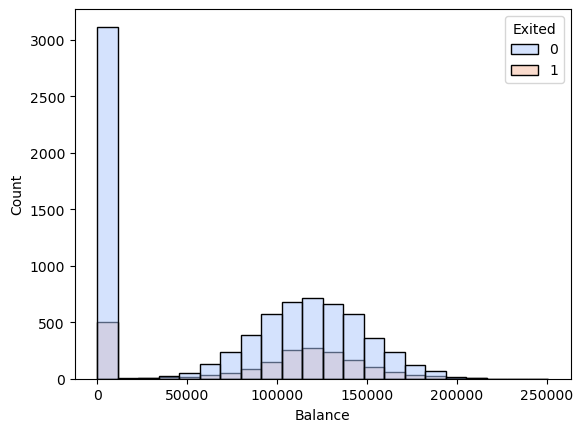

In [16]:
sns.histplot(df,x="Balance",hue="Exited",palette="coolwarm")

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

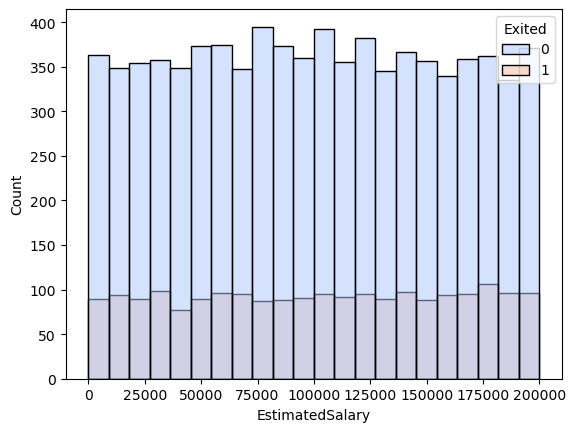

In [17]:
sns.histplot(df,x="EstimatedSalary",hue="Exited",palette="coolwarm")

<Axes: xlabel='Tenure', ylabel='Count'>

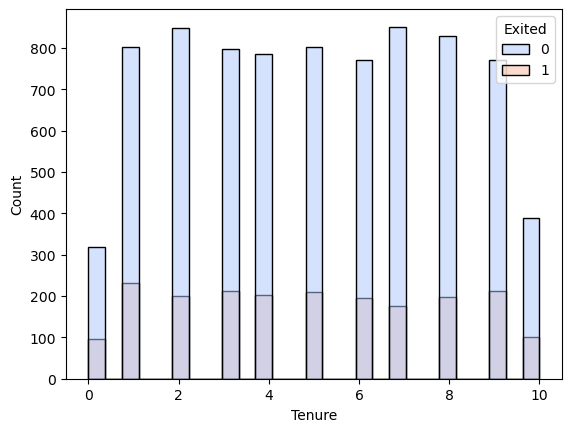

In [18]:
sns.histplot(df,x="Tenure",hue="Exited",palette="coolwarm")

<Axes: xlabel='NumOfProducts', ylabel='Count'>

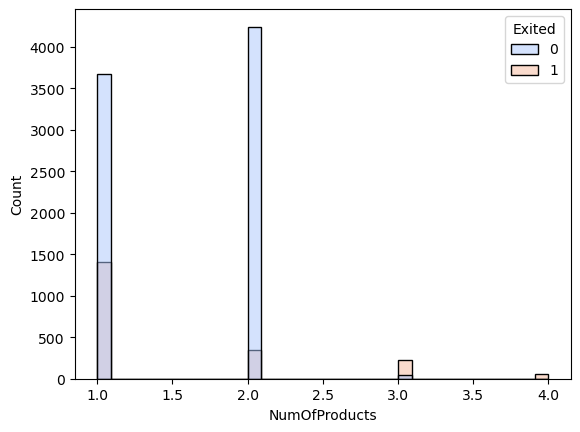

In [19]:
sns.histplot(df,x="NumOfProducts",hue="Exited",palette="coolwarm")

<Axes: xlabel='HasCrCard', ylabel='Count'>

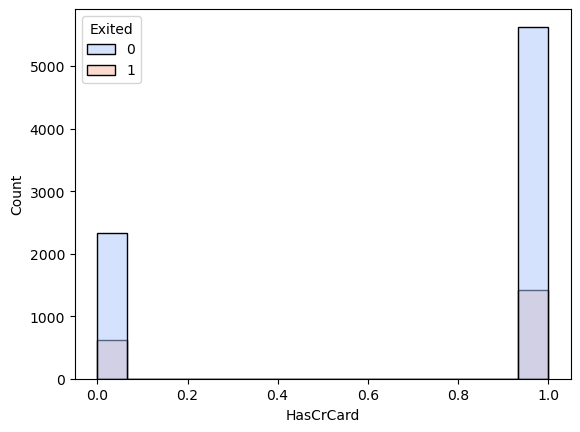

In [20]:
sns.histplot(df,x="HasCrCard",hue="Exited",palette="coolwarm")

<Axes: xlabel='IsActiveMember', ylabel='Count'>

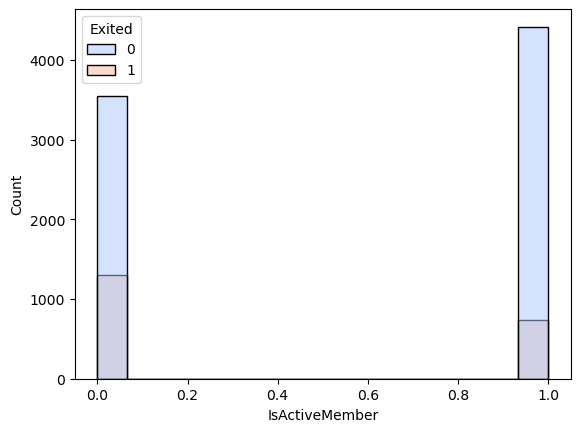

In [21]:
sns.histplot(df,x="IsActiveMember",hue="Exited",palette="coolwarm")

#### Through the histogram display of each variable based on the target varible, the following conclusions are drawn:
1.customers whose gerograpy are Germany have higher probability of exited.
2.compared with male, female have higher probability of exited.
3.customers whose creditscores are lower than 400 have higher probability of exited.
4.customers who have more than two products have higher probability of exited.
5.active members have higeher probablity of exited.

### 1.2.3 Correlation Analysis

In [22]:
cor=df.corr()

<Axes: >

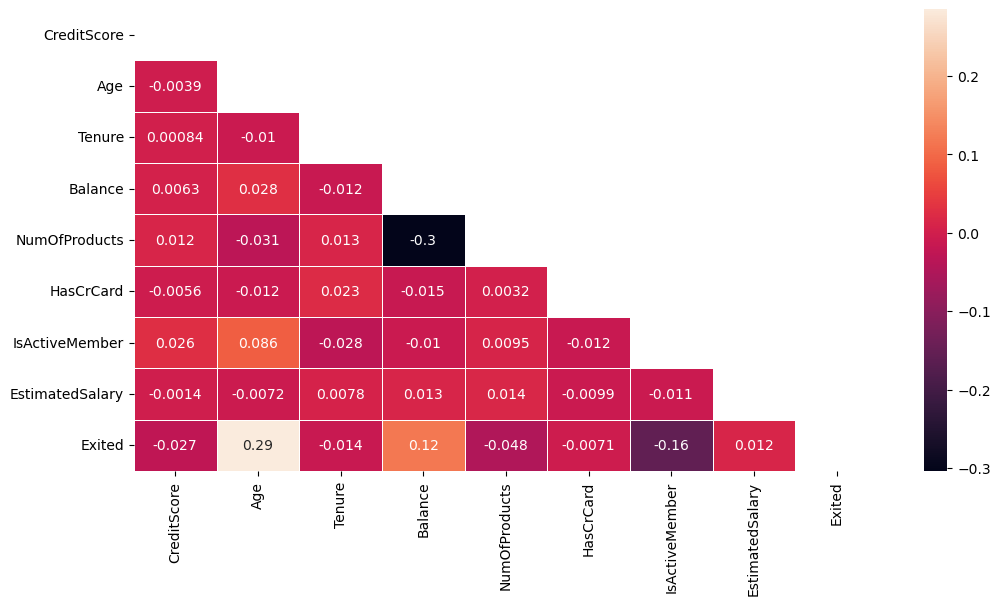

In [23]:
mask=np.triu(np.ones_like(cor))
plt.figure(figsize=(12,6))
sns.heatmap(data=cor,mask=mask,annot=True,linewidth=0.5,color="orange")

#### Through the correlation matrix analysis, the following conclusions are drawn:
1. Feature "Age"  and "Balance" are  positively correlated with the target variable
2. Feature "Number of products" is negitively correlated he target variable.
3. Other features are barely correlatived.
4. The correlation between features is low.

# 1.3 Data Processing

In [24]:
# splite dataset into features-X and target-y
y=df["Exited"].copy()
X=df.drop("Exited",axis=1)

### 1.3.1 missing values filled

In [25]:
# Numeric variables are filled with medians,while categorical variable are filled with mode.
X["Age"].fillna(X["Age"].median(), inplace=True)
X["IsActiveMember"].fillna(X["IsActiveMember"].median(), inplace=True)
X["HasCrCard"].fillna(X["HasCrCard"].median(), inplace=True)
X["Geography"].fillna(X["Geography"].mode()[0], inplace=True)

In [26]:
# check the filling result
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 859.4+ KB


### 1.3.2 feature engineering: derive new features

In [27]:
# define a function to derive three new features 'IsSenior','IsActiveByCreditCard' and 'ProductsPerTenure'

def getFeats(df): 
    df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 50 else 0)
    df['IsActiveByCreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['ProductsPerTenure'] =  df['Tenure'] / df['NumOfProducts']
    return df
    
# adding three new derived features to X, generate new dataset X_Engineering
X_Engineering= getFeats(X)

In [28]:
X_Engineering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           10000 non-null  int64  
 1   Geography             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Age                   10000 non-null  float64
 4   Tenure                10000 non-null  int64  
 5   Balance               10000 non-null  float64
 6   NumOfProducts         10000 non-null  int64  
 7   HasCrCard             10000 non-null  float64
 8   IsActiveMember        10000 non-null  float64
 9   EstimatedSalary       10000 non-null  float64
 10  IsSenior              10000 non-null  int64  
 11  IsActiveByCreditCard  10000 non-null  float64
 12  ProductsPerTenure     10000 non-null  float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.1+ MB


In [29]:
# describe and explore three new features with diagram and statisitics
X_Engineering.loc[:,('IsSenior','IsActiveByCreditCard','ProductsPerTenure')].describe()

,IsSenior,IsActiveByCreditCard,ProductsPerTenure
count,10000.000000,10000.000000,10000.000000
mean,0.139500,0.360700,3.740817
std,0.346485,0.480228,2.624782
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.500000
50%,0.000000,0.000000,3.000000
75%,0.000000,1.000000,5.000000
max,1.000000,1.000000,10.000000


In [30]:
X_Engineering['IsSenior'].value_counts()

0    8605
1    1395
Name: IsSenior, dtype: int64

In [31]:
X_Engineering['IsActiveByCreditCard'].value_counts()

0.0    6393
1.0    3607
Name: IsActiveByCreditCard, dtype: int64

<Axes: xlabel='ProductsPerTenure', ylabel='Density'>

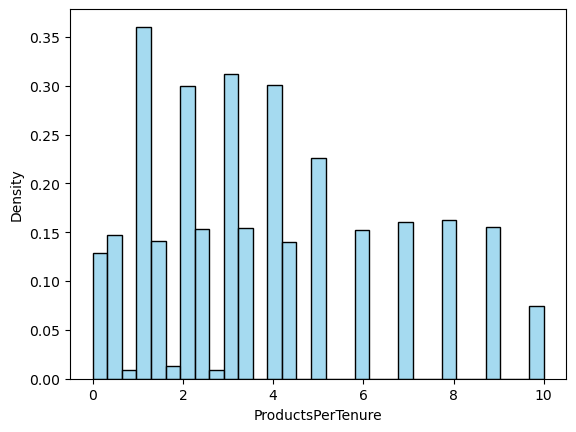

In [32]:
sns.histplot(X["ProductsPerTenure"],stat="density",color="skyblue")

### 1.3.3 encode categorical variables, and normalize numerical features

In [33]:
# combine the process of encode categorical variables and normalize numerical features into one processor
# meanwhile,keep other features unchanged, using remainder='passthrough'

pr1_features=["Geography","Gender"]
pr2_features=["Age","Balance","EstimatedSalary","CreditScore","Tenure","ProductsPerTenure"]

PreProcessor=ColumnTransformer([
    ('OrdinalEncoder',OrdinalEncoder(),pr1_features),
    ('StdScaler',StandardScaler(),pr2_features)
    ],
    remainder='passthrough')

X_PreProcessor_Array = PreProcessor.fit_transform(X_Engineering)

In [34]:
# check the processing results
feature_names_out =PreProcessor.get_feature_names_out()
check=pd.DataFrame(X_PreProcessor_Array,columns=feature_names_out)
check.head(10)

,OrdinalEncoder__Geography,OrdinalEncoder__Gender,StdScaler__Age,StdScaler__Balance,StdScaler__EstimatedSalary,StdScaler__CreditScore,StdScaler__Tenure,StdScaler__ProductsPerTenure,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__IsSenior,remainder__IsActiveByCreditCard
0,0.0,0.0,0.293431,-1.225848,0.021886,-0.326221,-1.041760,-0.663257,1.0,1.0,1.0,0.0,1.0
1,2.0,0.0,0.198071,0.117350,0.216534,-0.440036,-1.387538,-1.044260,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.293431,1.333053,0.240687,-1.536794,1.032908,-0.409255,3.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.007352,-1.225848,-0.108918,0.501521,-1.387538,-1.234761,2.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.388791,0.785728,-0.365276,2.063884,-1.041760,-0.663257,1.0,1.0,1.0,0.0,1.0
5,2.0,1.0,0.484151,0.597329,0.863650,-0.057205,1.032908,0.098750,2.0,1.0,0.0,0.0,0.0
6,0.0,1.0,1.056309,-1.225848,-1.565487,1.774174,0.687130,-0.091752,2.0,1.0,1.0,1.0,1.0
7,1.0,0.0,-0.946246,0.618019,0.334854,-2.840488,-0.350204,-1.044260,4.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.484151,1.050820,-0.437329,-1.547141,-0.350204,-0.663257,2.0,0.0,1.0,0.0,0.0
9,0.0,1.0,-0.183368,0.931463,-0.493230,0.346319,-1.041760,-0.663257,1.0,1.0,1.0,0.0,1.0


In [35]:
# Remove the column name prefix to make it consistent with the original feature name
modified_columns=feature_names_out.copy()
for prefixes in ["OrdinalEncoder__","StdScaler__","remainder__"]:
    modified_columns= [col.lstrip(''.join(prefixes)) if col.startswith(tuple(prefixes)) else col for col in modified_columns]
    
# generate processed features dataset X_PreProcessor in order to train models
X_PreProcessor=pd.DataFrame(X_PreProcessor_Array,columns=modified_columns)
X_PreProcessor.head()

,Geography,Gender,Age,Balance,EstimatedSalary,CreditScore,Tenure,ProductsPerTenure,NumOfProducts,HasCrCard,IsActiveMember,IsSenior,IsActiveByCreditCard
0,0.0,0.0,0.293431,-1.225848,0.021886,-0.326221,-1.041760,-0.663257,1.0,1.0,1.0,0.0,1.0
1,2.0,0.0,0.198071,0.117350,0.216534,-0.440036,-1.387538,-1.044260,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.293431,1.333053,0.240687,-1.536794,1.032908,-0.409255,3.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.007352,-1.225848,-0.108918,0.501521,-1.387538,-1.234761,2.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.388791,0.785728,-0.365276,2.063884,-1.041760,-0.663257,1.0,1.0,1.0,0.0,1.0


# 2. Model Building

## 2.1 Split the dataset into training and testing sets

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_PreProcessor,y, test_size = 0.2, random_state =1234,stratify=y)

In [37]:
# define a function to evaluate models by accuracy, precision, recall and f1
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score

def display_metrics(Y,Y_predictions):    
    precision = precision_score(Y,Y_predictions)
    recall= recall_score(Y,Y_predictions)
    accuracy = accuracy_score(Y,Y_predictions)
    f1 = f1_score(Y,Y_predictions)
    print(f"Accuracy：{accuracy:.4f}")
    print(f"Precision：{precision:.4f}")
    print(f"Recall：{recall:.4f}")
    print(f"F1：{f1:.4f}")

In [38]:
#define a function to finetune models using GridSearchCV
from sklearn.model_selection import GridSearchCV

def Finetune_CV(clf,param_grid,metric,cv_num):
    grid_search = GridSearchCV(clf, param_grid, cv=cv_num,
                           scoring=metric, return_train_score=True)
    grid_search.fit(X_train,y_train)
    #print(f"{metric}_best_params:{grid_search.best_params_}")
    cvres = grid_search.cv_results_
    print(f"mean_test_{metric} and params:\n")
    for score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(f"{score:.4f},{params}")

## 2.2 Implement Support Vector Classifier

### 2.2.1 build SVC model

In [39]:
from sklearn.svm import SVC

SVC=SVC(probability=True)
SVC.fit(X_train,y_train)
y_train_prediction=SVC.predict(X_train)

# display the accuracy on the train dataset
accuracy = accuracy_score(y_train,y_train_prediction)
print(f"Accuracy：{accuracy:.4f}")

Accuracy：0.8516


###  2.2.2 optimize model parameters for SVC

In [40]:
from sklearn.svm import SVC

# Specify the combination of parameters to iterate
param_grid = [
    { 'kernel':["poly","rbf"], 'C':[1,2,3]}
  ]
clf=SVC()

In [41]:
# using 5-fold cross-validation to find the optimal combination of parameters for SVC, evaluated by accuracy
# print the result of each round

# about the custom function Finetune_CV, please check codes in [38]
Finetune_CV(clf,param_grid,"accuracy",5)

mean_test_accuracy and params:

0.8449,{'C': 1, 'kernel': 'poly'}
0.8490,{'C': 1, 'kernel': 'rbf'}
0.8465,{'C': 2, 'kernel': 'poly'}
0.8511,{'C': 2, 'kernel': 'rbf'}
0.8467,{'C': 3, 'kernel': 'poly'}
0.8522,{'C': 3, 'kernel': 'rbf'}


##### from the results of each round, we can see {C=3,kernel='rbf'} is the optimal parameters combination for SVC

### 2.2.3 train with the optimized model: SVC(C=3,kernel='rbf',probability=True)

In [42]:
from sklearn.svm import SVC

SVC_Finetune= SVC(C=3,kernel='rbf',probability=True)

SVC_Finetune.fit(X_train,y_train)
y_finetune_prediction=SVC_Finetune.predict(X_train)

# print accuracy of finetune model on train dataset, compared with original model, the figure is up by 0.0114 (0.8516 before and 0.8630 after)
accuracy = accuracy_score(y_train,y_finetune_prediction)
print(f"Accuracy：{accuracy:.4f}")

Accuracy：0.8630


## 2.3 Implement Logistic Regression Classifier

### 2.3.1 build LogisicRegression model

In [43]:
from sklearn.linear_model import LogisticRegression

lg_reg=LogisticRegression()
lg_reg.fit(X_train, y_train)
y_train_prediction =lg_reg.predict(X_train)

# display the accuracy on the train dataset
accuracy = accuracy_score(y_train,y_train_prediction)
print(f"Accuracy：{accuracy:.4f}")

Accuracy：0.8161


### 2.3.2 optimize model parameters for LogisticRegression

In [44]:
# Specify the combination of parameters to iterate, start with solver and C
param_grid = [
    { 'solver':["liblinear","lbfgs"],'C':[0.01,0.1,1]}
  ]

clf=LogisticRegression()

Finetune_CV(clf,param_grid,"accuracy",5)

mean_test_accuracy and params:

0.8079,{'C': 0.01, 'solver': 'liblinear'}
0.8085,{'C': 0.01, 'solver': 'lbfgs'}
0.8166,{'C': 0.1, 'solver': 'liblinear'}
0.8144,{'C': 0.1, 'solver': 'lbfgs'}
0.8160,{'C': 1, 'solver': 'liblinear'}
0.8159,{'C': 1, 'solver': 'lbfgs'}


#### we can find that when solver='liblinear' and C is between 0.1 and 1, the result of cross-validation has the best performance

In [45]:
# continue using GridSearchCV to iterate the combination of penalty and C(narrowing the scale of C)
param_grid = [
    { 'C':[0.1,0.2,0.3,0.4],'penalty':["l1","l2"],}
  ]
clf=LogisticRegression(solver='liblinear')

Finetune_CV(clf,param_grid,"accuracy",5)

mean_test_accuracy and params:

0.8146,{'C': 0.1, 'penalty': 'l1'}
0.8166,{'C': 0.1, 'penalty': 'l2'}
0.8156,{'C': 0.2, 'penalty': 'l1'}
0.8170,{'C': 0.2, 'penalty': 'l2'}
0.8164,{'C': 0.3, 'penalty': 'l1'}
0.8168,{'C': 0.3, 'penalty': 'l2'}
0.8164,{'C': 0.4, 'penalty': 'l1'}
0.8161,{'C': 0.4, 'penalty': 'l2'}


##### from the result of each round, we can see {C= 0.2,penalty='l2',solver="liblinear"} is the optimal parameters combination for LgRegression

### 2.3.3 Train with the optimized model : LogisticRegression(C= 0.2,penalty='l2',solver="liblinear")

In [46]:
lg_reg_Finetune=LogisticRegression(C= 0.2,penalty='l2',solver="liblinear")

lg_reg_Finetune.fit(X_train, y_train)
y_finetune_prediction =lg_reg_Finetune.predict(X_train)

# print accuracy of finetune model on train dataset, compared with original model, the figure is up by 0.0009 (0.8161 before and 0.8170 after)
accuracy = accuracy_score(y_train,y_finetune_prediction)
print(f"Accuracy：{accuracy:.4f}")

Accuracy：0.8170


# 3. Prediction and Evaluation

## 3.1 Evaluate and compare models by metrics

In [47]:
# using both of optimal SVC and optimal LgRegression models to predict the test dataset
y_test_svc=SVC_Finetune.predict(X_test)
y_test_lg=lg_reg_Finetune.predict(X_test)

# print metrics of each model to compare their performance
print("metrics of post-optimized SVC model:\n")
display_metrics(y_test,y_test_svc)

print("\nmetrics of post-optimized  LogsiticRegression model:\n")
display_metrics(y_test,y_test_lg)

metrics of post-optimized SVC model:

Accuracy：0.8495
Precision：0.8232
Recall：0.3317
F1：0.4729

metrics of post-optimized  LogsiticRegression model:

Accuracy：0.8045
Precision：0.5615
Recall：0.1794
F1：0.2719


##### SVC_Finetune model performs better evaluated by each of the metirc( accuracy, precision ,recall and f1).

## 3.2 Compare models by ROC curves

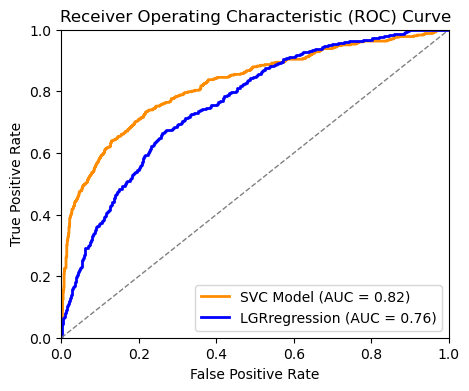

In [48]:
# draw ROC curves of optimal SVC and optimal LgRegression to compare their perfomance

from sklearn.metrics import roc_curve,auc

# calculate ROC for SVC 
y_test_svc_prob=SVC_Finetune.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = roc_curve(y_test, y_test_svc_prob)
roc_auc1 = auc(fpr1, tpr1)

# calculate ROC for LogisticRegression
y_test_lg_prob=lg_reg_Finetune.predict_proba(X_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test, y_test_lg_prob)
roc_auc2 = auc(fpr2, tpr2)

# draw ROC curves
plt.figure(figsize=(5,4))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='SVC Model (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='LGRregression (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#####  from this diagram,we can see that SVC_Finetune is the best-performing model, with 0.06 higher in AUC metirc

# 4. Model Interpretation

## 4.1 Use confusion matrix to interpret the results of the best model

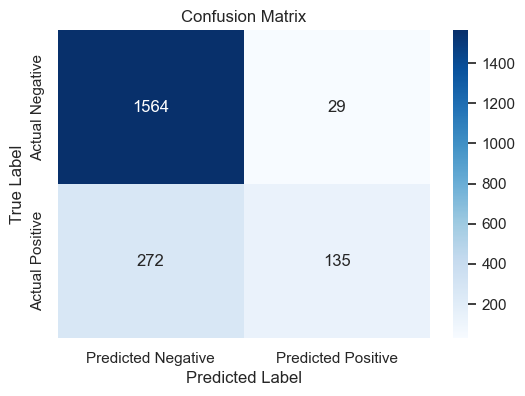

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_svc)

# change cm into DataFrame in order using seaborn
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# draw heatmap
plt.figure(figsize=(6, 4))
sns.set(font_scale=1) 
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12}) 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Interpret the results of the best model
1. The model predicted correctly 135 extied customers and 1564 churn customers out of 2000 customers,with the accuracy is 84.95%.
2. Out of 164 customers who is classified as exited customers, 135 customers are acutal exited customers, with the precision is 82.32%.
3. However, the model did poorly at recalling all exited customers, out of 407 exited customers, it predicted only 135,with recall 33.17%

## 4.2 use SHapley Additive exPlanations to identify the most important features

In [51]:
import shap
explainer = shap.SamplingExplainer(SVC_Finetune.predict_proba, X_train, sampling_method="approximate")
shap_values = explainer.shap_values(X_test)

  0%|          | 0/2000 [00:00<?, ?it/s]

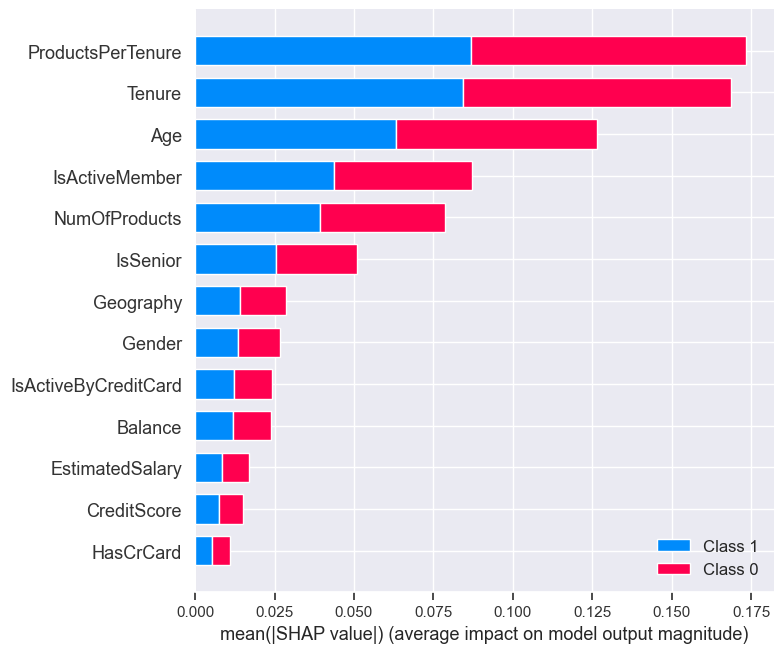

In [54]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

##### from the shap_value diagram shown, we can see :
1.the derived feature "ProductsPerTenue"  has the highest contribution to classify, followed by "Tenue" . The shap_values of this two features are quite close. 
2."Age" ,"isActiveMember" ,"NumOfProducts" ,"IsSenior" ranks the third to the sixth.
3."HasCrCard" has the lowest contribution to detect customers churn, the shap_values of "CreditScore" and "EstimatedSalary" are merely higher than "HasCrCard". 
4.The remaining features rank in the middle position.